The median entropy value of the passwords is: 41.3594


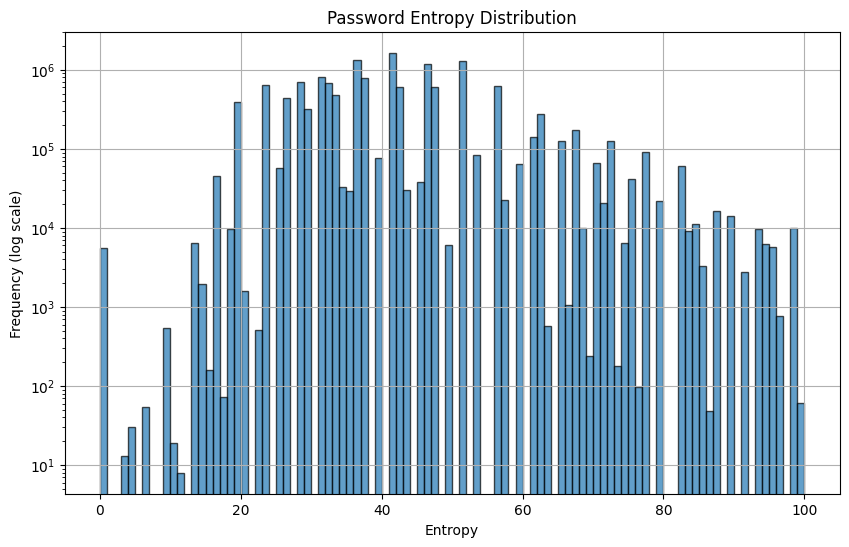

In [20]:
import math
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import re

# Define the entropy calculation function
def entropy(password: str) -> float:
    score = 0
    charset_size = 0
    if re.search(r"[A-Z]", password):
        charset_size += 26  # Uppercase letters
    if re.search(r"[a-z]", password):
        charset_size += 26  # Lowercase letters
    if re.search(r"\d", password):
        charset_size += 10  # Digits
    if re.search(r"[!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~]", password):
        charset_size += len("!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~")  # Special characters

    if charset_size > 0:
        entropy = len(password) * math.log2(charset_size)
        score += entropy

    return round(score, 4)

# Read all text files in the directory
def read_all_txt_files_in_directory(directory_path, encoding='utf-8'):
    combined_lines = []
    for filename in os.listdir(directory_path):
        file_path = os.path.join(directory_path, filename)
        if os.path.isfile(file_path) and file_path.endswith('.txt'):
            with open(file_path, 'r', encoding=encoding,errors="ignore") as file:
                lines = file.readlines()
                combined_lines.extend(line.strip() for line in lines if line.strip())
                
    return combined_lines

password_directory = '../src/database'


passwords = read_all_txt_files_in_directory(password_directory)
passwords = [line.strip() for line in passwords]

# Calculate entropy for each password
entropies = [entropy(password) for password in passwords]

df = pd.DataFrame(entropies, columns=['Entropy'])

median_entropy = df['Entropy'].median()

print(f"The median entropy value of the passwords is: {median_entropy}")


plt.figure(figsize=(10, 6))
plt.hist(df['Entropy'], bins=100, range=(0, 100), edgecolor='black', alpha=0.7)
plt.yscale('log')
plt.title('Password Entropy Distribution')
plt.xlabel('Entropy')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()